### In this chapter , We will learn how to build a personalized movie recommendation system based on user preferences.

In [1]:
#Import required libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Import datasets from local directory

In [2]:
movies = pd.read_csv('data/tmdb_5000_movies.csv')
credits = pd.read_csv('data/tmdb_5000_credits.csv') 

In [3]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
movies.shape , credits.shape

((4803, 20), (4803, 4))

### Merge Movies and Credits data using title column 

In [5]:
movies = movies.merge(credits,on='title')

In [6]:
movies.head(2)
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [7]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [8]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### Data Preprocessing Steps

In [9]:
import ast

In [10]:
def convert(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [11]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4809, dtype: object

In [12]:
#Reassign the column to converted column data
movies['genres'] = movies['genres'].apply(convert)

In [13]:
#Apply same function to keywords column in dataframe
movies['keywords'] = movies['keywords'].apply(convert)

In [14]:
# Convert cast function , we will pick only the top 3 casts and ignore the rest

def convert_cast(text):
    L=[]
    counter = 0
    for i in ast.literal_eval(text):
        if counter !=3 :
            L.append(i['name'])
            counter +=1
        else:
            break
    return L

In [15]:
movies['cast'] = movies['cast'].apply(convert_cast)

In [16]:
movies['crew'][4808]

'[{"credit_id": "58ce021b9251415a390165d9", "department": "Production", "gender": 2, "id": 6888, "job": "Executive Producer", "name": "Clark Peterson"}, {"credit_id": "58ce0232c3a36850e90157da", "department": "Production", "gender": 2, "id": 61051, "job": "Executive Producer", "name": "Andrew Reimer"}, {"credit_id": "52fe44e8c3a368484e03da8d", "department": "Directing", "gender": 2, "id": 85563, "job": "Director", "name": "Brian Herzlinger"}, {"credit_id": "52fe44e8c3a368484e03da87", "department": "Directing", "gender": 2, "id": 94471, "job": "Director", "name": "Jon Gunn"}, {"credit_id": "52fe44e8c3a368484e03da97", "department": "Directing", "gender": 0, "id": 997560, "job": "Director", "name": "Brett Winn"}]'

In [17]:
# Reuse Convert cast function to get director name only from crew column

def fetch_director(text):
    L=[]
    for i in ast.literal_eval(text):
        if i['job'] =='Director' :
            L.append(i['name'])
    return L

In [18]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [19]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [20]:
# Remove spaces between words

def collapse(text):
    L1=[]
    for i in text:
        L1.append(i.replace(" ",""))
    return L1   

In [21]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [22]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


In [23]:
movies.dropna(inplace=True)

In [24]:
# convert overview column into a list using split method

#movies['overview'].apply(lambda x : x.split())
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [25]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


### create tags column

In [26]:
movies['tags'] = movies['overview'] + movies['genres'] +movies['keywords'] + movies['cast'] + movies['crew']

In [27]:
new_df = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [28]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [29]:
# join tags column data which is in list format to single long text using .join method
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

In [30]:
new_df.head(2)

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."


In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem(text):
    y =[]

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
# perform stemming and update tags column
new_df['tags'] = new_df['tags'].apply(stem)

### Create Recommend model using sklearn modules

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features =5000,stop_words ='english')

In [34]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [35]:
#this will be a sparse matrix, only specific words would have values in the 5000 words feature vector rest would be zeroes
vectors[0] 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#this gives list of all the features used for vectorization
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(vectors)

In [38]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [39]:
#the steps performed here are 
#enumerate :- add enumerate to keep the index from original sequnce, sorted in reverse order to get the highest similarity scores
# key = lambda x:x[1] :- to sort the movies based on scores added key column using lambda,
#[1:6] :- to get the top 5 exclusing the first item
sorted(list(enumerate(similarity[0])),reverse=True,key = lambda x:x[1])[1:6]

[(1214, 0.28676966733820225),
 (2405, 0.26901379342448517),
 (3728, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [40]:
def recommend(movie):
    #get the index of the movie which user has passed as input
    movie_index = new_df[new_df['title'] == movie].index[0]
    #search the index in similarity matrix and get the top 5 movie names with highest similarity scores
    distances = similarity[movie_index]
    movies_list =sorted(list(enumerate(distances)),reverse=True,key = lambda x:x[1])[1:6]

    for i in movies_list:
        print (new_df.iloc[i[0]].title)

In [41]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [89]:
recommend('Batman')

Batman
Batman & Robin
Batman Begins
Batman Returns
The R.M.


### Save the model using Pickle library

In [42]:
import pickle

In [43]:
pickle.dump(new_df,open("movie_list.pkl",'wb'))
pickle.dump(similarity,open("similarity.pkl",'wb'))

### Streamlit app screenshot created using app.py

We reused the exported model and similarity pickle files to create a steamlit web app for Movie Recommender System

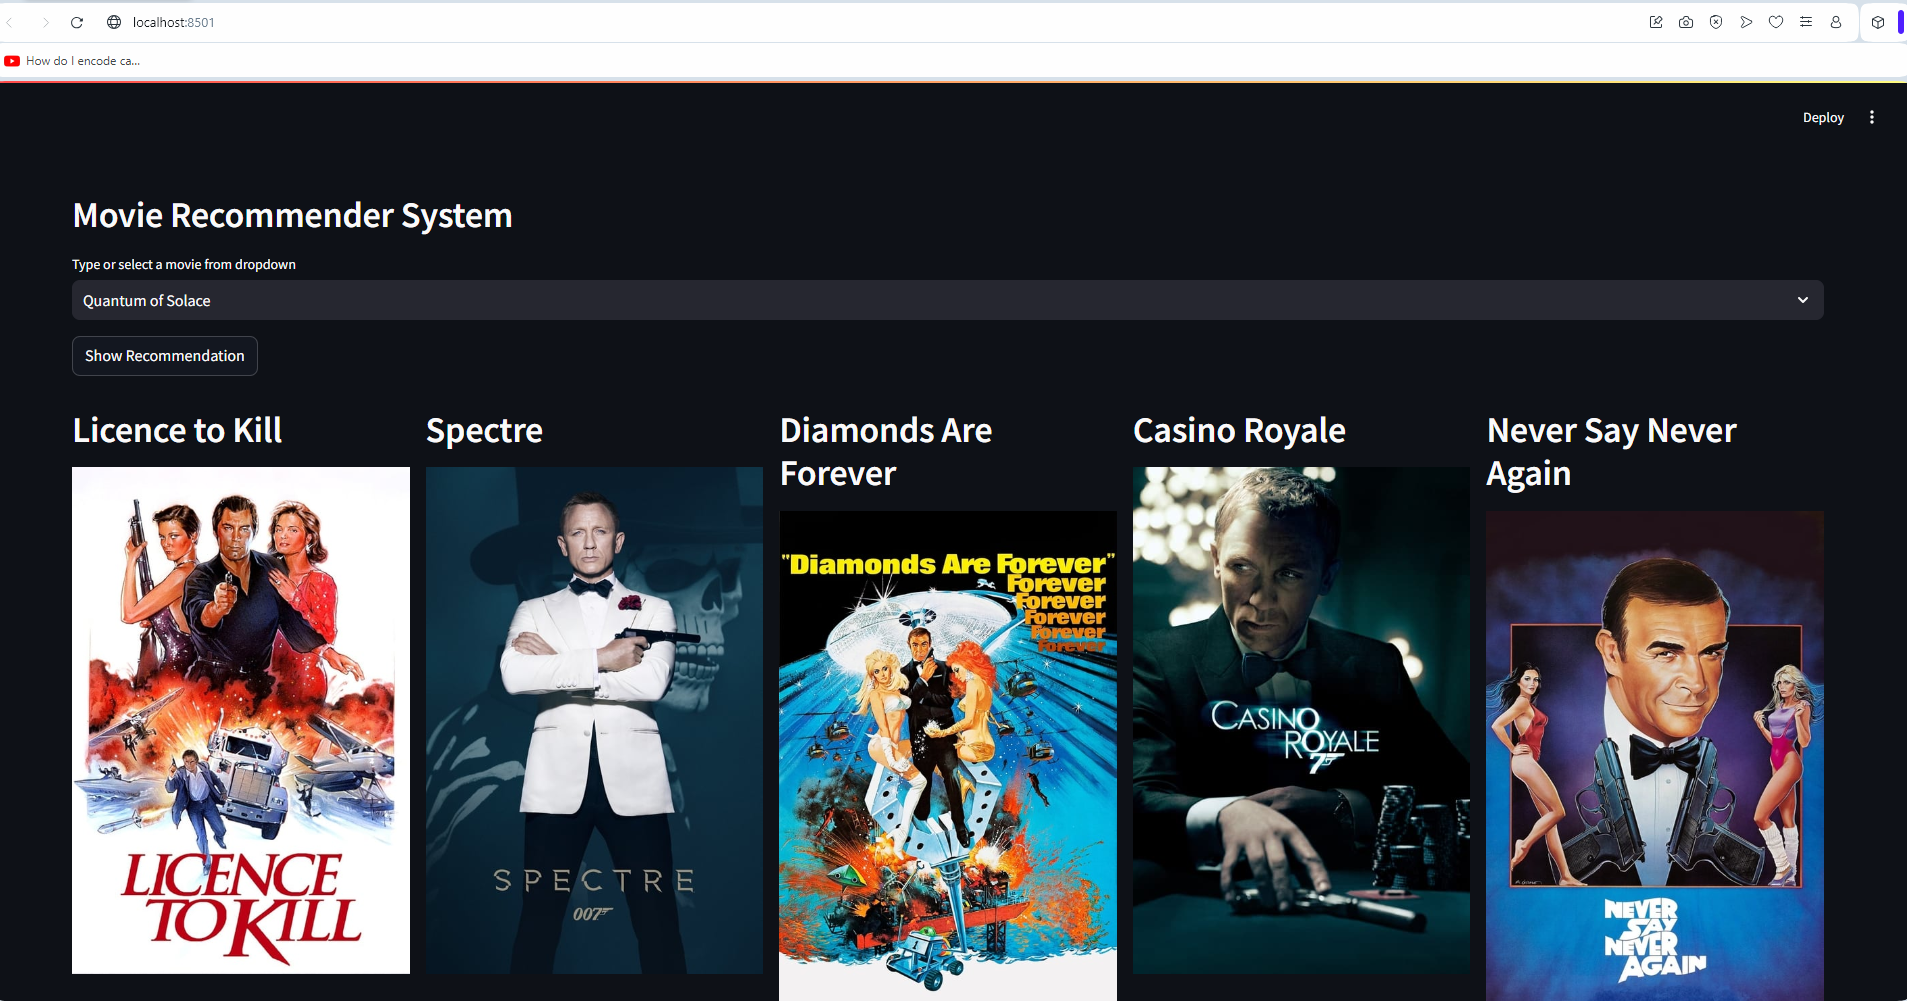